<a href="https://colab.research.google.com/github/Mukthat-31/HeartShield/blob/main/earlydiseaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [7]:
from google.colab import files
uploaded = files.upload()



Saving heart_disease.csv to heart_disease.csv


In [27]:
df = pd.read_csv("heart_disease.csv")
df
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Dataset Shape: (10000, 21)

Columns: ['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sleep Hours', 'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level', 'Heart Disease Status']

Data Types:
 Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     fl

In [11]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [29]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])


cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

for col in ['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours',
            'Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]


df.to_csv("heart_disease_clean.csv", index=False)
print("Final dataset shape:", df.shape)

Final dataset shape: (10000, 21)


In [30]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [31]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [32]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nShape after removing outliers:", df.shape)


Shape after removing outliers: (10000, 21)


In [33]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                 Age  Blood Pressure  Cholesterol Level           BMI  \
count  10000.000000    10000.000000       10000.000000  10000.000000   
mean      49.295400      149.758200         225.427300     29.077274   
std       18.167574       17.556268          43.510401      6.300156   
min       18.000000      120.000000         150.000000     18.002837   
25%       34.000000      134.000000         187.000000     23.668887   
50%       49.000000      150.000000         226.000000     29.079492   
75%       65.000000      165.000000         263.000000     34.509009   
max       80.000000      180.000000         300.000000     39.996954   

        Sleep Hours  Triglyceride Level  Fasting Blood Sugar     CRP Level  \
count  10000.000000        10000.000000         10000.000000  10000.000000   
mean       6.991359          250.732500           120.141900      7.472200   
std        1.751002           86.953962            23.558053      4.334601   
min        4.0006

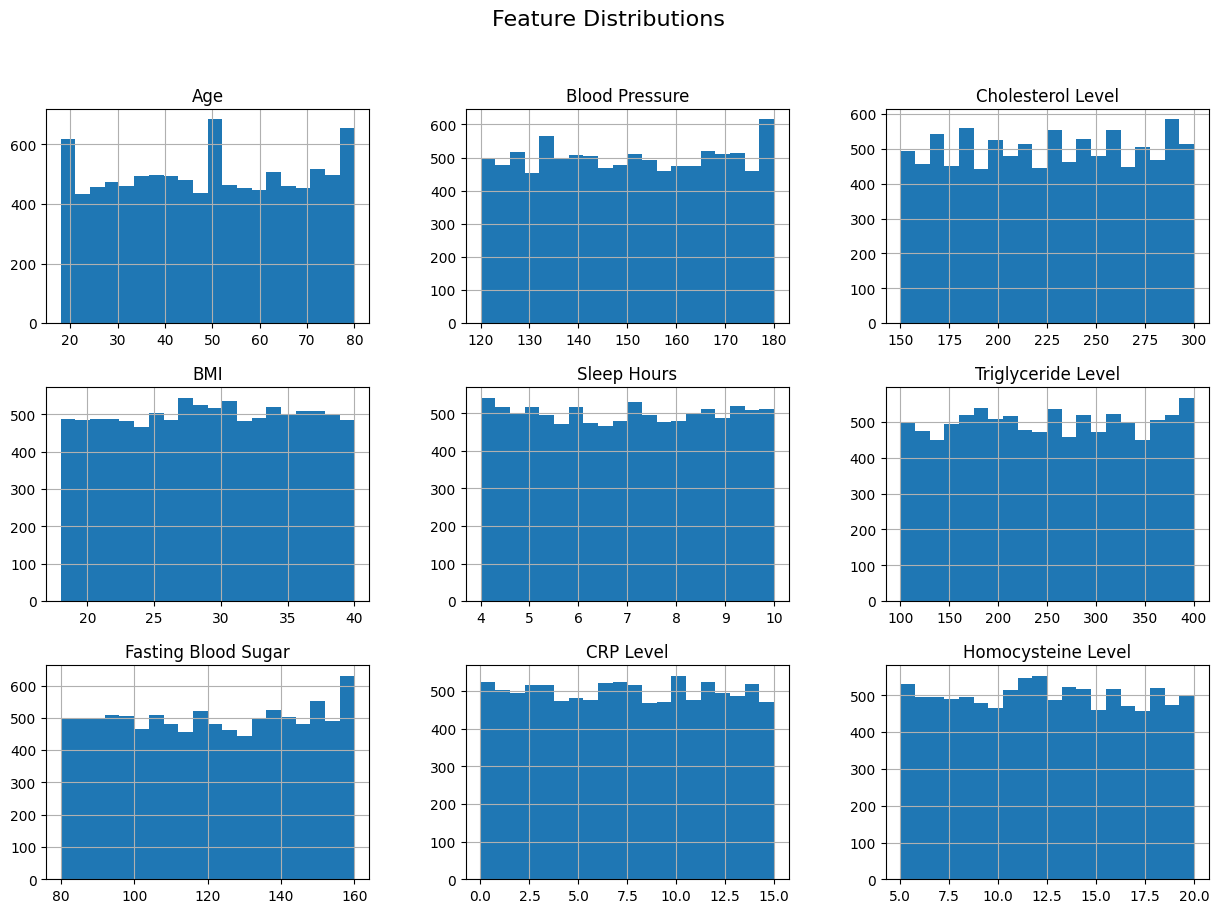

In [36]:
# Histogram for numerical columns
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

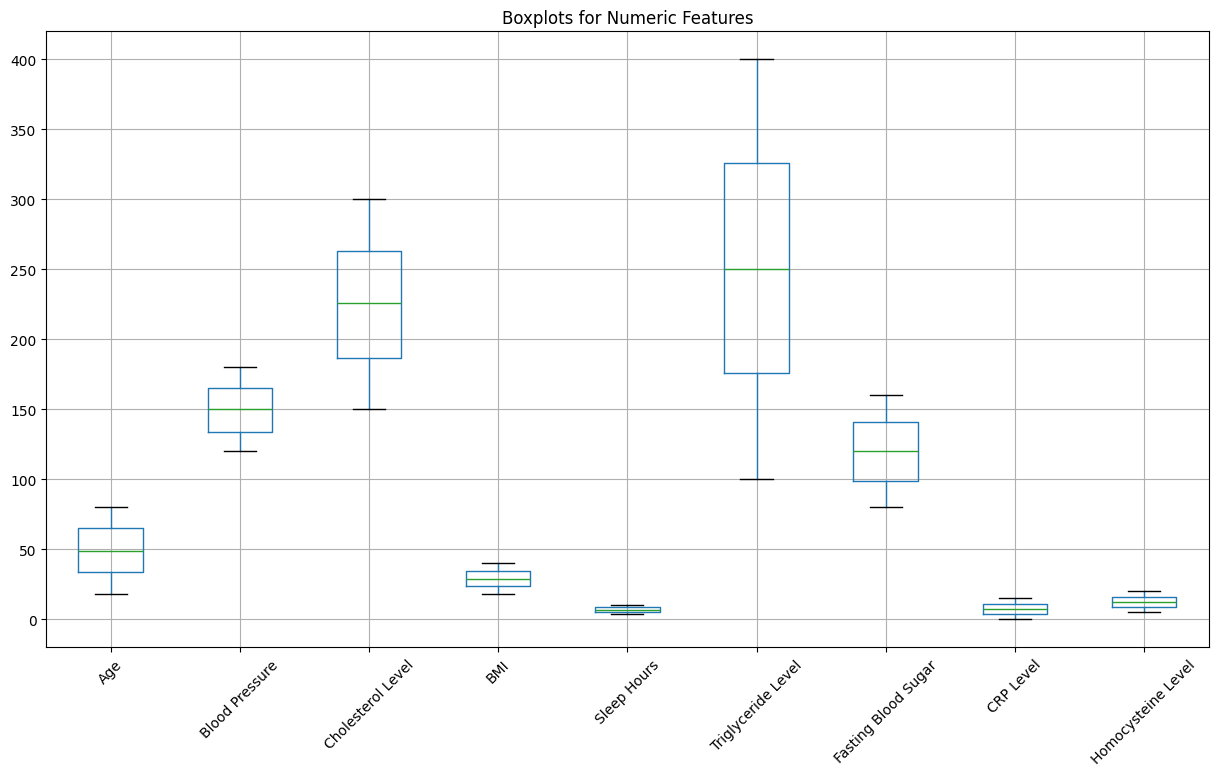

In [35]:
# Boxplots for outlier visualization
plt.figure(figsize=(15,8))
df[numeric_cols].boxplot()
plt.title("Boxplots for Numeric Features")
plt.xticks(rotation=45)
plt.show()

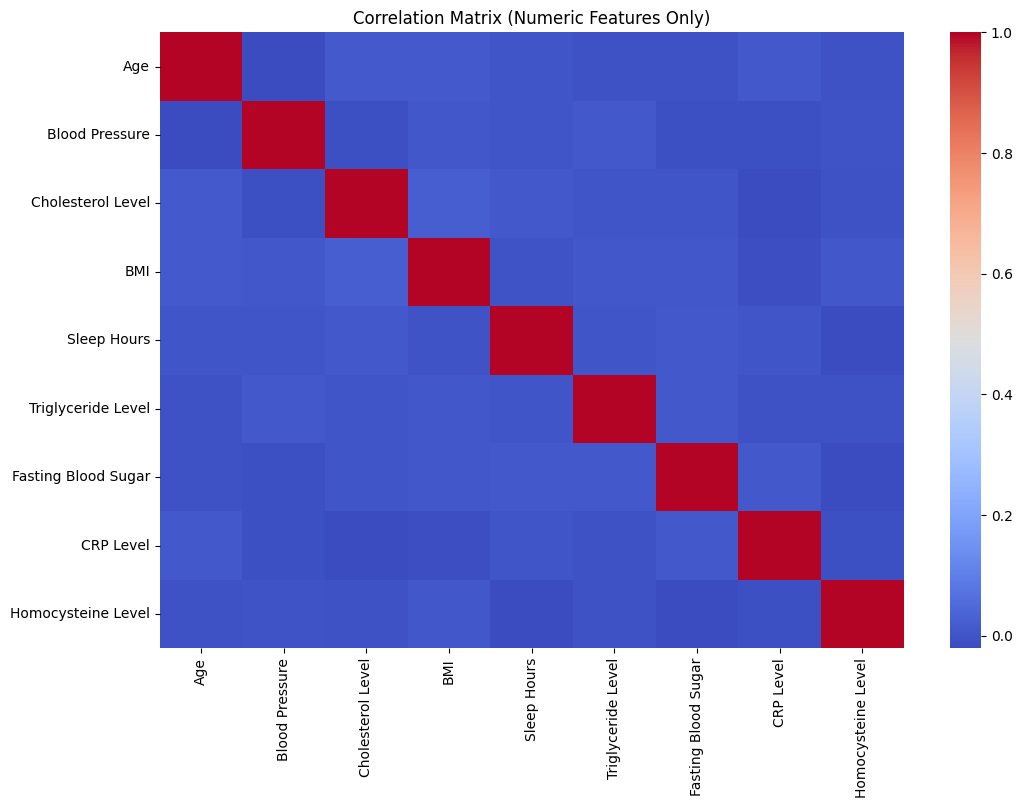

In [38]:

# Correlation Heatmap (only numeric features)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [39]:
df.to_csv("heart_disease_clean.csv", index=False)
print("\n✅ Preprocessing Done. Clean dataset saved as 'heart_disease_clean.csv'")


✅ Preprocessing Done. Clean dataset saved as 'heart_disease_clean.csv'
